In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

In [2]:
# Parameters
duration = 1.0
fs = 400.0
samples = int(fs * duration)
t = np.arange(samples) / fs

In [3]:
# Generate a chirp signal with modulating amplitude
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0 * np.pi * 3.0 * t))

In [4]:
# Apply the Hilbert transform to generate the analytic signal
analytic_signal = hilbert(signal)

In [5]:
# Calculate the amplitude envelope, instantaneous phase, and instantaneous frequency
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0 * np.pi) * fs)

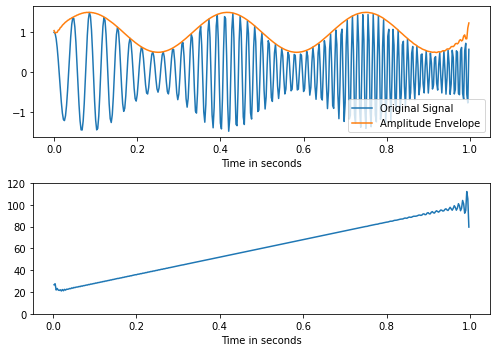

In [6]:
# Plot the results
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(7, 5))

# Plot the original signal and its amplitude envelope
ax0.plot(t, np.real(analytic_signal), label='Original Signal')
ax0.plot(t, amplitude_envelope, label='Amplitude Envelope')
ax0.set_xlabel("Time in seconds")
ax0.legend()

# Plot the instantaneous frequency
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("Time in seconds")
ax1.set_ylim(0.0, 120.0)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()